In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
train_filename=r'D:\life\myplace\python\machine_learning\titanic\train.csv'
test_filename=r'D:\life\myplace\python\machine_learning\titanic\test.csv'
train_data=pd.read_csv(train_filename)
test_data=pd.read_csv(test_filename)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train_data['Ticket_count']=train_data['Ticket'].map(train_data['Ticket'].value_counts()) 
train_data['Fare_mean']=train_data['Fare']/train_data['Ticket_count']

In [35]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_count,Fare_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,30.0000


In [36]:
bins=[0,6,14,18,60,120]
labels=['baby','child','teen','aldult','old']
train_data['age_group']=pd.cut(train_data['Age'],bins=bins,labels=labels,right=False)
train_data
train_data.loc[train_data['Age'].isna(),'Age']=train_data['Age'].mean()
train_data.loc[train_data['age_group'].isna(),'age_group']='aldult'

In [37]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_count,Fare_mean,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,7.2500,aldult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,71.2833,aldult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.9250,aldult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,26.5500,aldult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,8.0500,aldult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,13.0000,aldult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,30.0000,aldult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2,11.7250,aldult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,30.0000,aldult


In [38]:
mask=~train_data['Ticket'].str.isdigit()#不是纯数字的车票号码拆分成两列
split_result = train_data.loc[mask, 'Ticket'].str.split(' ', n=1, expand=True)

train_data.loc[mask, 'ticket_pre'] = split_result[0]# 赋值到新列
train_data.loc[mask, 'ticket_last'] = split_result[1]

pure_digit_mask = train_data['Ticket'].str.isdigit()# 对于纯数字的票号，前缀为空，后缀为票号本身
train_data.loc[pure_digit_mask, 'ticket_last'] = train_data.loc[pure_digit_mask, 'Ticket']
train_data.loc[pure_digit_mask, 'ticket_pre'] = ''

In [39]:
train_data['ticket_last'] = train_data['ticket_last'].astype(str)
train_data['ticket_last'] = train_data['ticket_last'].str.replace(r'[a-zA-Z\s]', '', regex=True)
train_data['ticket_last']=pd.to_numeric(train_data['ticket_last'],errors='coerce', downcast='integer')


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Ticket_count  891 non-null    int64   
 13  Fare_mean     891 non-null    float64 
 14  age_group     891 non-null    category
 15  ticket_pre    891 non-null    object  
 16  ticket_last   887 non-null    float64 
dtypes: category(1), float64(4), int64(6), object(6)
memory

In [41]:
median_value=train_data['ticket_last'].median()
train_data.loc[train_data['ticket_last'].isna(),'ticket_last']=median_value

In [42]:
train_data['Cabin_num']=train_data['Cabin'].str[::-1].str.extract(r'([a-zA-Z])', expand=False)
train_data['Cabin_num']

train_data['Cabin'] = train_data['Cabin'].astype(str)
train_data['Cabin'] = train_data['Cabin'].str.replace(r'[a-zA-Z]', '', regex=True)

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         891 non-null    object  
 11  Embarked      889 non-null    object  
 12  Ticket_count  891 non-null    int64   
 13  Fare_mean     891 non-null    float64 
 14  age_group     891 non-null    category
 15  ticket_pre    891 non-null    object  
 16  ticket_last   891 non-null    float64 
 17  Cabin_num     204 non-null    object  
dtypes: categor

In [44]:
#拆分姓名和称呼
split_result = train_data['Name'].str.split(',', n=1, expand=True)
train_data['f_name']=split_result[0]
train_data['t_name']=split_result[1]
split_result1=train_data['t_name'].str.split('.', n=1, expand=True)
train_data['t_name']=split_result1[0]
train_data['l_name']=split_result1[1]

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         891 non-null    object  
 11  Embarked      889 non-null    object  
 12  Ticket_count  891 non-null    int64   
 13  Fare_mean     891 non-null    float64 
 14  age_group     891 non-null    category
 15  ticket_pre    891 non-null    object  
 16  ticket_last   891 non-null    float64 
 17  Cabin_num     204 non-null    object  
 18  f_name    

In [46]:
#cabin缺失值太多，看看有没有规律能够填充上去的
train_data[(train_data['Cabin'].notna()) &(train_data['Fare']!=0)].groupby(['Cabin_num','Pclass']).agg({
    'Fare_mean':['min','mean','max','count']
})

train_data[(train_data['Fare']!=0)].groupby(['Pclass']).agg({
    'Fare_mean':['min','mean','max','count']
})

train_data[(train_data['Cabin'].notna()) &(train_data['Fare']!=0)].groupby(['Pclass','Cabin_num']).agg({
    'Fare_mean':['min','mean','max','count'],
    'Cabin_num':['count']
})

Fare_mean                             Cabin_num
                        min       mean        max count     count
Pclass Cabin_num                                                 
1      A          26.000000  38.563836   81.85830    14        14
       B           5.000000  54.233673  170.77640    45        45
       C          26.000000  47.169304  221.77920    59        59
       D          25.576400  37.667962   76.29170    29        29
       E          25.587500  36.289584   83.15830    25        25
       T          35.500000  35.500000   35.50000     1         1
2      D          12.875000  13.166675   13.79170     4         4
       E           5.250000  10.275000   13.00000     4         4
       F           8.666667  12.375000   19.50000     8         8
3      E           6.237500   7.926037   11.17915     4         4
       F           7.750000   7.750000    7.75000     1         1
       G           5.231250   7.158929    8.35000     7         7

In [47]:
#可以观察到只有CDE包含了三种等级的舱位，其他的只有一种舱位。但不知道怎么用
train_data['Cabin_Pclass'] = train_data['Cabin_num'].astype(str) + train_data['Pclass'].astype(str)

In [48]:
train_data[train_data['Cabin_num'].notna()&(train_data['Fare_mean']!=0)].groupby('Cabin_Pclass').agg({
    'Fare_mean':['mean','min','max','count'],
    'Survived':['sum']
})#可以观察到，不同的票价对应不同的舱位，不同的舱位存活率不同。再画一个散点图，观察舱位和票价之间的关系，说不定能推测出空白的舱位号，并且可以把类似票价的舱位合并


Fare_mean                             Survived
                   mean        min        max count      sum
Cabin_Pclass                                                
A1            38.563836  26.000000   81.85830    14        7
B1            54.233673   5.000000  170.77640    45       35
C1            47.169304  26.000000  221.77920    59       35
D1            37.667962  25.576400   76.29170    29       22
D2            13.166675  12.875000   13.79170     4        3
E1            36.289584  25.587500   83.15830    25       18
E2            10.275000   5.250000   13.00000     4        3
E3             7.926037   6.237500   11.17915     4        4
F2            12.375000   8.666667   19.50000     8        7
F3             7.750000   7.750000    7.75000     1        0
G3             7.158929   5.231250    8.35000     7        2
T1            35.500000  35.500000   35.50000     1        0

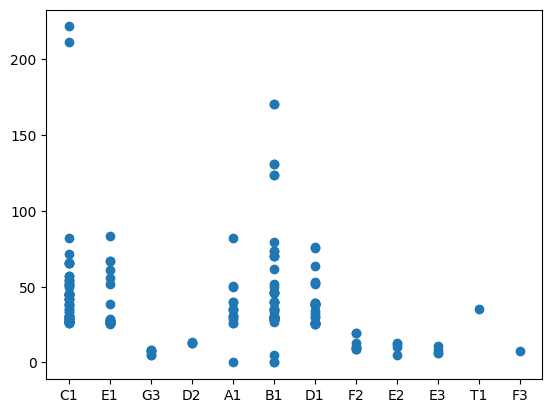

In [49]:
mask=train_data['Cabin_num'].notna()
plt.scatter(train_data.loc[mask,'Cabin_Pclass'], train_data.loc[mask,'Fare_mean'])#观察图可得：A1B1C1D1E1是高票价舱大于25.57，其他为第票价舱。由此来给数据预测舱位
high=['A1','B1','C1','D1','E1']
for i in train_data['Cabin_Pclass']:
    if len(i)>0:
        if i in high:
            train_data['fare_class']='high'
        else:
            train_data['fare_class']='low'
    elif train_data['Fare_mean']>25.57:
        train_data['fare_class']='high'
    else:
            train_data['fare_class']='low'



In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         891 non-null    object  
 11  Embarked      889 non-null    object  
 12  Ticket_count  891 non-null    int64   
 13  Fare_mean     891 non-null    float64 
 14  age_group     891 non-null    category
 15  ticket_pre    891 non-null    object  
 16  ticket_last   891 non-null    float64 
 17  Cabin_num     204 non-null    object  
 18  f_name    

In [51]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_mean,age_group,ticket_pre,ticket_last,Cabin_num,f_name,t_name,l_name,Cabin_Pclass,fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,7.2500,aldult,A/5,21171.0,NaN,Braund,Mr,Owen Harris,nan3,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,71.2833,aldult,PC,17599.0,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),C1,low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,7.9250,aldult,STON/O2.,3101282.0,NaN,Heikkinen,Miss,Laina,nan3,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,26.5500,aldult,,113803.0,C,Futrelle,Mrs,Jacques Heath (Lily May Peel),C1,low
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,8.0500,aldult,,373450.0,NaN,Allen,Mr,William Henry,nan3,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,13.0000,aldult,,211536.0,NaN,Montvila,Rev,Juozas,nan2,low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,30.0000,aldult,,112053.0,B,Graham,Miss,Margaret Edith,B1,low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,11.7250,aldult,W./C.,6607.0,NaN,Johnston,Miss,"Catherine Helen ""Carrie""",nan3,low
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,30.0000,aldult,,111369.0,C,Behr,Mr,Karl Howell,C1,low


In [52]:
#训练准备
#创建pclass、tname、embarked\age_group\性别的独热编码备用
pclass_mapping=pd.get_dummies(train_data['Pclass'])
pclass_mapping

tname_mapping=pd.get_dummies(train_data['t_name'])
tname_mapping

Embarked_mapping=pd.get_dummies(train_data['Embarked'])
Embarked_mapping

agegroup_mapping=pd.get_dummies(train_data['age_group'])
agegroup_mapping

sex_mapping=pd.get_dummies(train_data['Sex'])
sex_mapping

fareclass_mapping=pd.get_dummies(train_data['fare_class'])
fareclass_mapping


,low
0,True
1,True
2,True
3,True
4,True
...,...
886,True
887,True
888,True
889,True


In [53]:
#做一个训练数据，组合独热编码查看效果
new_traindata_X=train_data[['SibSp','Parch','ticket_last','Fare_mean']]#数字类型的列

In [54]:
#建立六种不同维度的训练数据
new_traindata_X1=np.hstack((new_traindata_X,pclass_mapping))
new_traindata_X2=np.hstack((new_traindata_X1,tname_mapping))
new_traindata_X3=np.hstack((new_traindata_X2,Embarked_mapping))
new_traindata_X4=np.hstack((new_traindata_X3,agegroup_mapping))
new_traindata_X5=np.hstack((new_traindata_X4,sex_mapping))
new_traindata_X6=np.hstack((new_traindata_X5,fareclass_mapping))

new_traindata_Y=train_data['Survived']

In [55]:
#维数约减
#用协方差矩阵判断能否进行维数约减
cov_data_x6=np.corrcoef(new_traindata_X6.T)
cov_data_x6


C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1.        ,  0.4148377 ,  0.082993  , ...,  0.11463081,
        -0.11463081,         nan],
       [ 0.4148377 ,  1.        , -0.00315308, ...,  0.24548896,
        -0.24548896,         nan],
       [ 0.082993  , -0.00315308,  1.        , ..., -0.0337728 ,
         0.0337728 ,         nan],
       ...,
       [ 0.11463081,  0.24548896, -0.0337728 , ...,  1.        ,
        -1.        ,         nan],
       [-0.11463081, -0.24548896,  0.0337728 , ..., -1.        ,
         1.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], shape=(35, 35))

<Figure size 10000x10000 with 0 Axes>

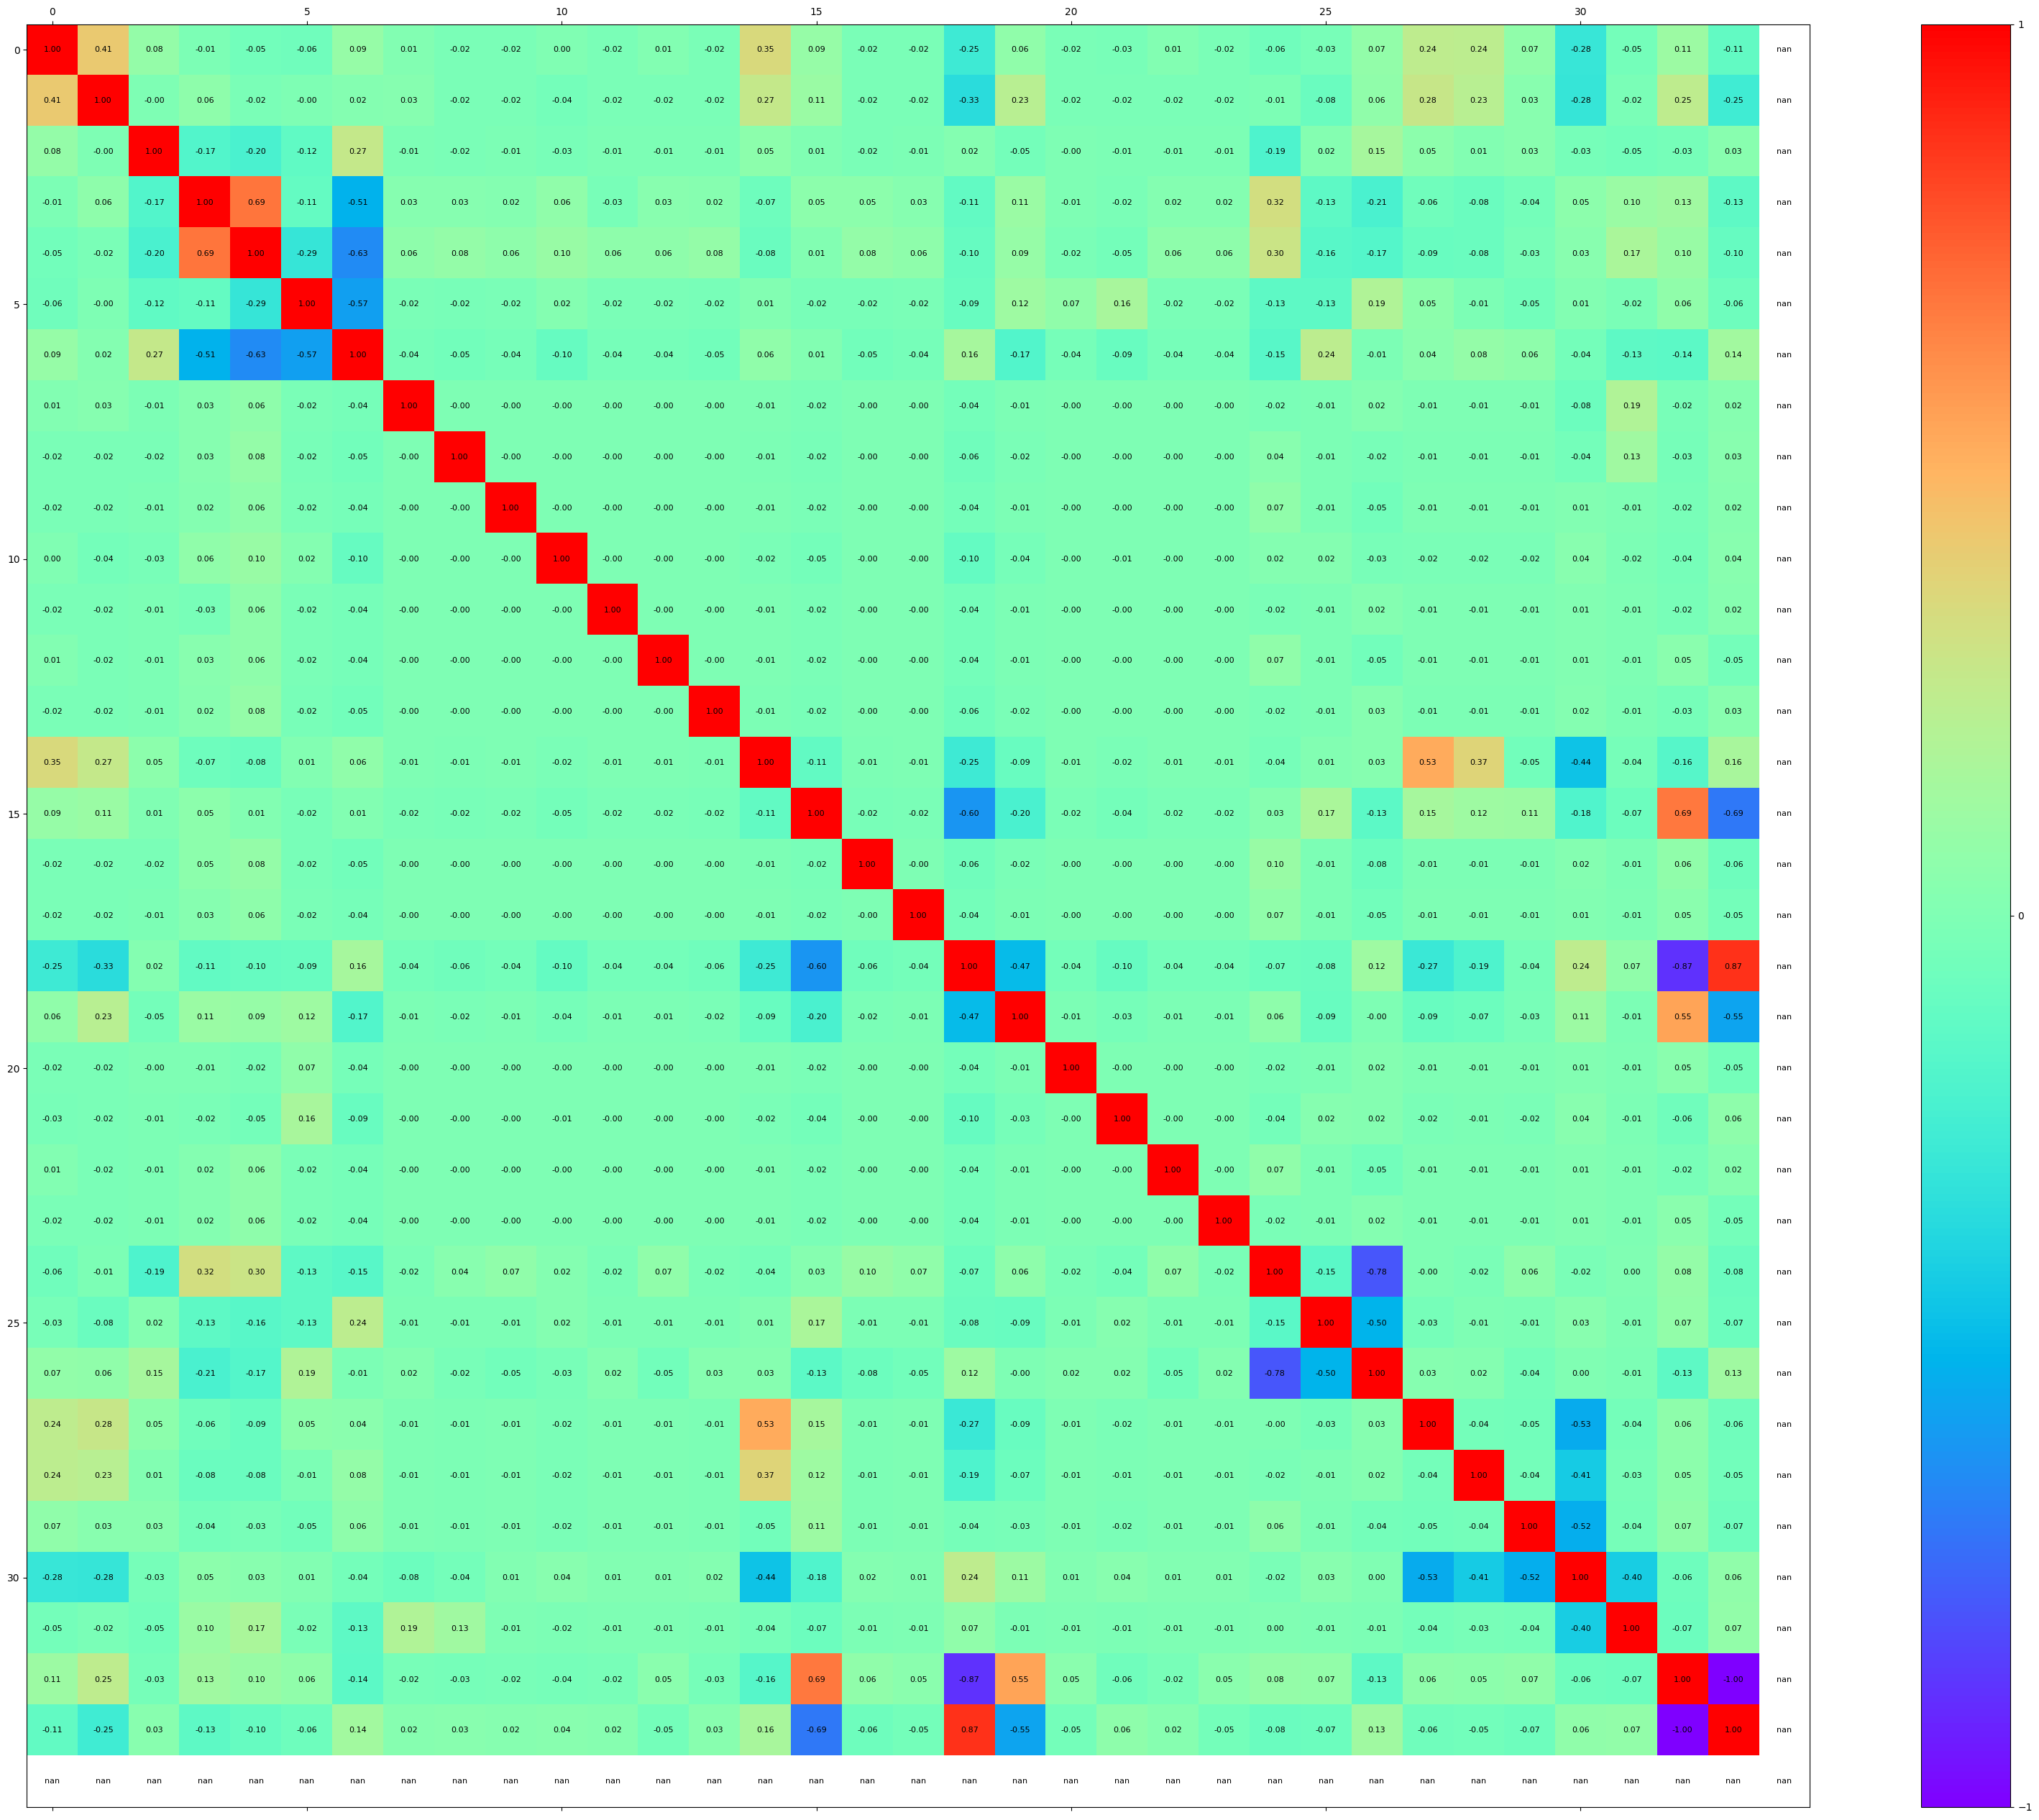

In [56]:
#画一个矩阵热力图显示协方差矩阵
plt.figure(figsize=(100, 100)) 
img=plt.matshow(cov_data_x6,cmap=plt.cm.rainbow)
fig = plt.gcf()
fig.set_size_inches(40, 32)  #修改画布大小
plt.colorbar(img,ticks=[-1,0,1],fraction=0.045)# 为热图添加颜色条（图例
for x in range(cov_data_x6.shape[0]):
    for y in range(cov_data_x6.shape[1]):
        plt.text(x,y,"%.2f"% cov_data_x6[x,y],size=8,color='black',ha='center',va='center')
plt.show()

In [57]:
#通过矩阵热图观察大概只有11维的关联性比较大，用PCA分析主成分
from sklearn.decomposition import PCA 
pca_x6_11=PCA(n_components=11)
x6_11w=pca_x6_11.fit_transform(new_traindata_X6)
x6_11w.shape
pca_x6_11.explained_variance_ratio_.sum()#结果是：0.9999999999993804 非常好

np.float64(0.9999999999993804)

In [58]:
#2维
pca_x6_2=PCA(n_components=2)
x6_2w=pca_x6_2.fit_transform(new_traindata_X6)
x6_2w.shape
pca_x6_2.explained_variance_ratio_.sum()

np.float64(0.9999999999876276)

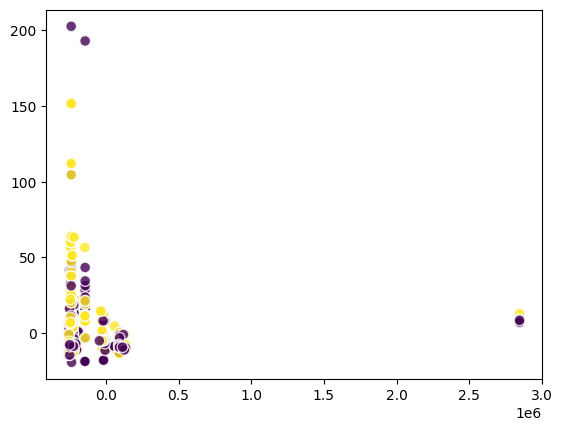

In [59]:
#查看散点图
plt.scatter(x6_2w[:,0],x6_2w[:,1],c=new_traindata_Y,alpha=0.8,s=60,marker='o',edgecolors='white')#分类结果并不理想，改用有监督的降维
plt.show()

C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python

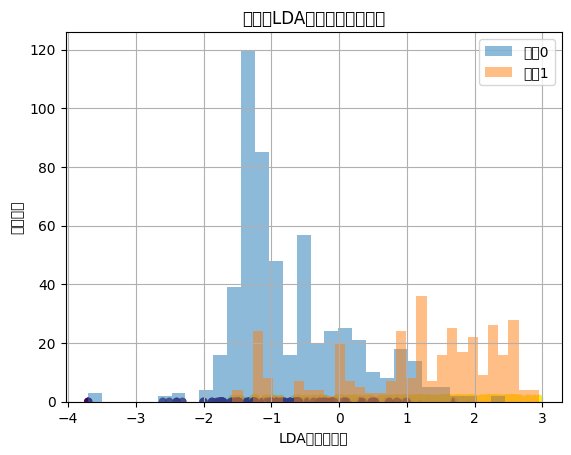

In [60]:
#用LDA试试
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_x6_2w=LinearDiscriminantAnalysis(n_components=1)
x6_2w_lda=lda_x6_2w.fit_transform(new_traindata_X6,new_traindata_Y)
plt.scatter(x6_2w_lda,new_traindata_Y,c=new_traindata_Y,alpha=0.8,edgecolors='None')
plt.hist(x6_2w_lda[new_traindata_Y==0], bins=30, alpha=0.5, label='类别0')
plt.hist(x6_2w_lda[new_traindata_Y==1], bins=30, alpha=0.5, label='类别1')
plt.xlabel('LDA一维投影值')
plt.ylabel('样本数量')
plt.title('类别在LDA一维投影上的分布')
plt.legend()
plt.grid(True)
plt.show()#效果好一些了但是也一般，减少一些无关特征试试

C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python

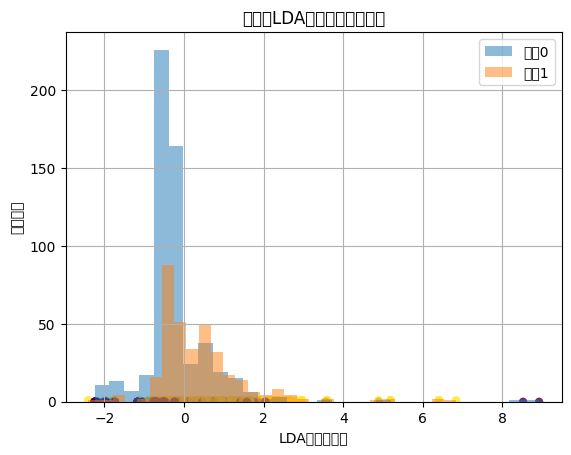

In [61]:
lda_x_1w=LinearDiscriminantAnalysis(n_components=1)
x_1w_lda=lda_x_1w.fit_transform(new_traindata_X,new_traindata_Y)
plt.scatter(x_1w_lda,new_traindata_Y,c=new_traindata_Y,alpha=0.8,edgecolors='None')
plt.hist(x_1w_lda[new_traindata_Y==0], bins=30, alpha=0.5, label='类别0')
plt.hist(x_1w_lda[new_traindata_Y==1], bins=30, alpha=0.5, label='类别1')
plt.xlabel('LDA一维投影值')
plt.ylabel('样本数量')
plt.title('类别在LDA一维投影上的分布')
plt.legend()
plt.grid(True)
plt.show()#效果更差

C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python

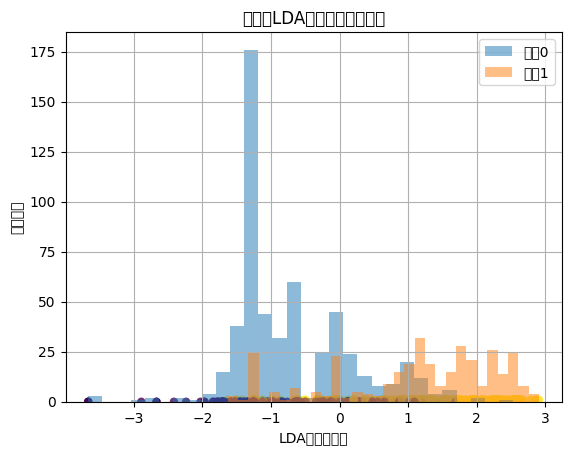

In [62]:
lda_x3_1w=LinearDiscriminantAnalysis(n_components=1)
x3_1w_lda=lda_x3_1w.fit_transform(new_traindata_X3,new_traindata_Y)
plt.scatter(x3_1w_lda,new_traindata_Y,c=new_traindata_Y,alpha=0.8,edgecolors='None')
plt.hist(x3_1w_lda[new_traindata_Y==0], bins=30, alpha=0.5, label='类别0')
plt.hist(x3_1w_lda[new_traindata_Y==1], bins=30, alpha=0.5, label='类别1')
plt.xlabel('LDA一维投影值')
plt.ylabel('样本数量')
plt.title('类别在LDA一维投影上的分布')
plt.legend()
plt.grid(True)
plt.show()#和X6差不多

C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python

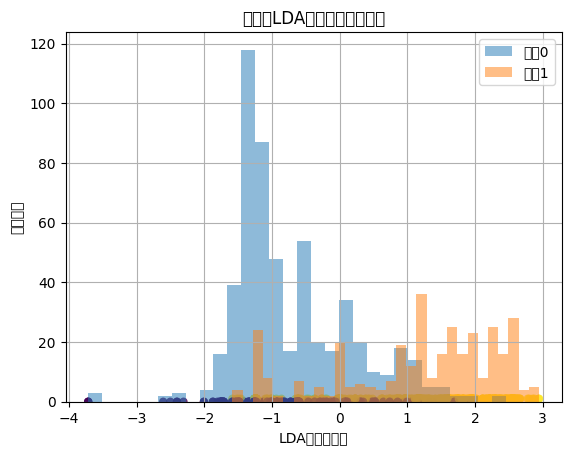

In [63]:
lda_x4_1w=LinearDiscriminantAnalysis(n_components=1)
x4_1w_lda=lda_x4_1w.fit_transform(new_traindata_X4,new_traindata_Y)
plt.scatter(x4_1w_lda,new_traindata_Y,c=new_traindata_Y,alpha=0.8,edgecolors='None')
plt.hist(x4_1w_lda[new_traindata_Y==0], bins=30, alpha=0.5, label='类别0')
plt.hist(x4_1w_lda[new_traindata_Y==1], bins=30, alpha=0.5, label='类别1')
plt.xlabel('LDA一维投影值')
plt.ylabel('样本数量')
plt.title('类别在LDA一维投影上的分布')
plt.legend()
plt.grid(True)
plt.show()#对比后发现pclass_mapping这个字段作用不大

In [64]:
#去掉这个组再逐个试试效果
new_traindata_X2=np.hstack((new_traindata_X,tname_mapping))
new_traindata_X3=np.hstack((new_traindata_X2,Embarked_mapping))
new_traindata_X4=np.hstack((new_traindata_X3,agegroup_mapping))
new_traindata_X5=np.hstack((new_traindata_X4,sex_mapping))
new_traindata_X6=np.hstack((new_traindata_X5,fareclass_mapping))#6相对于5变化不明显，淘汰

In [65]:
new_traindata_X1=np.hstack((new_traindata_X,sex_mapping))
new_traindata_X2=np.hstack((new_traindata_X1,tname_mapping))
new_traindata_X3=np.hstack((new_traindata_X2,Embarked_mapping))#这两个数据集效果还行，算是最佳了，大致分开但中间部分有重叠
new_traindata_X4=np.hstack((new_traindata_X3,agegroup_mapping))#这两个数据集效果还行，算是最佳了，大致分开但中间部分有重叠 

In [66]:
new_traindata_X7=np.delete(new_traindata_X4,2,axis=1)
new_traindata_X8=np.delete(new_traindata_X7,2,axis=1)
new_traindata_X8=np.delete(new_traindata_X8,1,axis=1)#去掉了ticketlast和平均票价和父母列效果还略好一点，目前的最佳
new_traindata_X8_noage=new_traindata_X8[:,:-5]#去掉了年龄分组和平均票价和父母列效果还略好一点，目前的最佳
new_traindata_X10=np.delete(new_traindata_X2,2,axis=1)#加入模型训练后最好的结果


C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zhoum\AppData\Local\Programs\Python

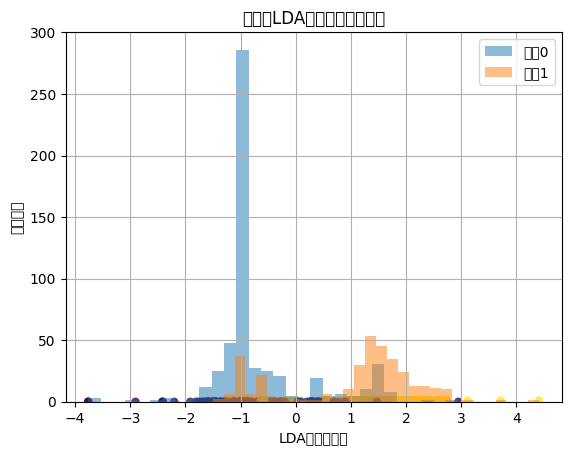

In [67]:
lda_x10_1w=LinearDiscriminantAnalysis(n_components=1)
x10_1w_lda=lda_x10_1w.fit_transform(new_traindata_X10,new_traindata_Y)
plt.scatter(x10_1w_lda,new_traindata_Y,c=new_traindata_Y,alpha=0.8,edgecolors='None')
plt.hist(x10_1w_lda[new_traindata_Y==0], bins=30, alpha=0.5, label='类别0')
plt.hist(x10_1w_lda[new_traindata_Y==1], bins=30, alpha=0.5, label='类别1')
plt.xlabel('LDA一维投影值')
plt.ylabel('样本数量')
plt.title('类别在LDA一维投影上的分布')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
#用x8来训练一下试试：
from sklearn.model_selection import train_test_split

# 用LDA之前的原始特征划分
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    new_traindata_X8,  # 原始特征，改成x10后是最佳的，X2也差不多
    new_traindata_Y,   # 目标变量
    test_size=0.2,     # 20%测试集
    random_state=42,
    stratify=new_traindata_Y  # 保持类别比例
)

# 在训练集上训练LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_orig, y_train)

# 用训练好的LDA转换测试集
X_test_lda = lda.transform(X_test_orig)

from sklearn.linear_model import LogisticRegression#经过对比，用x2和x10做线性回归后，模型的效果最好
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练逻辑回归
lr_model = LogisticRegression(random_state=42)#用未经过lda处理的数据训练效果不如处理后的，说明还是有用
lr_model.fit(X_train_lda, y_train)

# 预测
y_train_pred = lr_model.predict(X_train_lda)
y_test_pred = lr_model.predict(X_test_lda)

print(f"训练集准确率: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"测试集准确率: {accuracy_score(y_test, y_test_pred):.4f}")

训练集准确率: 0.8146
测试集准确率: 0.7877


In [69]:
#用x10来训练一下试试：
from sklearn.model_selection import train_test_split

# 用LDA之前的原始特征划分
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    new_traindata_X10,  # 原始特征，改成x10后是最佳的，X2也差不多
    new_traindata_Y,   # 目标变量
    test_size=0.2,     # 20%测试集
    random_state=42,
    stratify=new_traindata_Y  # 保持类别比例
)

# 在训练集上训练LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_orig, y_train)

# 用训练好的LDA转换测试集
X_test_lda = lda.transform(X_test_orig)

from sklearn.linear_model import LogisticRegression#经过对比，用x2和x10做线性回归后，模型的效果最好
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练逻辑回归
lr_model = LogisticRegression(random_state=42)#用未经过lda处理的数据训练效果不如处理后的，说明还是有用
lr_model.fit(X_train_lda, y_train)

# 预测
y_train_pred = lr_model.predict(X_train_lda)
y_test_pred = lr_model.predict(X_test_lda)

print(f"训练集准确率: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"测试集准确率: {accuracy_score(y_test, y_test_pred):.4f}")

训练集准确率: 0.8272
测试集准确率: 0.8380


In [70]:
#用x2来训练一下试试：
from sklearn.model_selection import train_test_split

# 用LDA之前的原始特征划分
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    new_traindata_X2,  # 原始特征，改成x10后是最佳的，X2也差不多
    new_traindata_Y,   # 目标变量
    test_size=0.2,     # 20%测试集
    random_state=42,
    stratify=new_traindata_Y  # 保持类别比例
)

# 在训练集上训练LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_orig, y_train)

# 用训练好的LDA转换测试集
X_test_lda = lda.transform(X_test_orig)

from sklearn.linear_model import LogisticRegression#经过对比，用x2和x10做线性回归后，模型的效果最好
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 训练逻辑回归
lr_model = LogisticRegression(random_state=42)#用未经过lda处理的数据训练效果不如处理后的，说明还是有用
lr_model.fit(X_train_lda, y_train)

# 预测
y_train_pred = lr_model.predict(X_train_lda)
y_test_pred = lr_model.predict(X_test_lda)

print(f"训练集准确率: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"测试集准确率: {accuracy_score(y_test, y_test_pred):.4f}")

训练集准确率: 0.8230
测试集准确率: 0.8380
